In [1]:
import arviz as az
import pymc3 as pm
from IPython.display import Markdown

from data import dataloader
from models.pymc3_models import Model

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = dataloader.get_jla()
sne_data = df[["mag", "redshift", "stretch", "color", "host_mass"]]

model = Model(
    sne_data, hubble_constant=70, host_mass_correction_model="step"
)

model

TypeError: float() argument must be a string or a number, not 'TransformedRV'

In [7]:
with model:
    trace = pm.sample(1000, chains=4, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [size, loc, M_B, $\beta$, $\alpha$, $\sigma_{HR}$]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 105 seconds.
There were 639 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 652 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 843 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 895 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6663784861003126, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase targ

array([[<AxesSubplot:title={'center':'M_B\n0'}>,
        <AxesSubplot:title={'center':'M_B\n0'}>],
       [<AxesSubplot:title={'center':'loc\n0'}>,
        <AxesSubplot:title={'center':'loc\n0'}>],
       [<AxesSubplot:title={'center':'size\n0'}>,
        <AxesSubplot:title={'center':'size\n0'}>]], dtype=object)

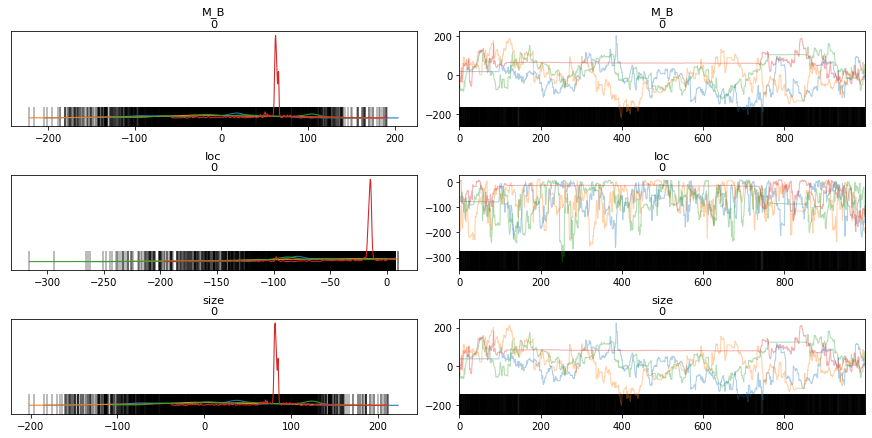

In [9]:
az.plot_trace(trace, var_names=[v.name for v in model.pooled_vars])

## MCMC Results

## Unpooled Variable

Variables shared by all SN

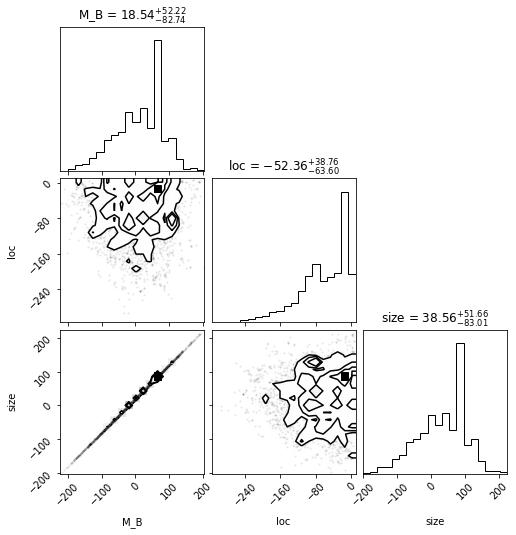

In [10]:
from corner import corner
import numpy as np 

labels = [v.name for v in model.pooled_vars]
corner(np.vstack([trace[k].flatten() for k in labels]).T, labels=labels, show_titles=True);

### Pooled Variable

Variables related to a specific SN. Let's arbritrarily study oen